In [1]:
# Sourcing and Loading data 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") 

In [3]:
eth = pd.read_csv('EthereumData.csv') 

In [4]:
eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,6-Jan-21,"1,207.77","1,099.77","1,210.78","1,060.67",3.75M,9.85%
1,5-Jan-21,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%
2,4-Jan-21,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%
3,3-Jan-21,974.97,774.54,"1,008.49",769.57,4.02M,25.88%
4,2-Jan-21,774.5,729,787.26,715.15,2.25M,6.22%


In [5]:
eth = eth[::-1] 
eth.head() 

,Date,Price,Open,High,Low,Vol.,Change %
1763,10-Mar-16,11.75,11.2,11.85,11.07,0.00K,4.91%
1762,11-Mar-16,11.95,11.75,11.95,11.75,0.18K,1.70%
1761,12-Mar-16,12.92,11.95,13.45,11.95,0.83K,8.12%
1760,13-Mar-16,15.07,12.92,15.07,12.92,1.30K,16.64%
1759,14-Mar-16,12.5,15.07,15.07,11.4,92.18K,-17.05%


In [6]:
sp500 = pd.read_csv('S&P500data.csv') 

In [7]:
sp500.head() 

,Date,Close/Last,Volume,Open,High,Low
0,1/6/2021,3748.14,--,3712.20,3783.04,3705.34
1,1/5/2021,3726.86,--,3698.02,3737.83,3695.07
2,1/4/2021,3700.65,--,3764.61,3769.99,3662.71
3,12/31/2020,3756.07,--,3733.27,3760.20,3726.88
4,12/30/2020,3732.04,--,3736.19,3744.63,3730.21


In [8]:
sp500 = sp500[::-1]
sp500.head()

,Date,Close/Last,Volume,Open,High,Low
1215,3/10/2016,1989.57,--,1990.97,2005.08,1969.25
1214,3/11/2016,2022.19,--,1994.71,2022.37,1994.71
1213,3/14/2016,2019.64,--,2019.27,2024.57,2012.05
1212,3/15/2016,2015.93,--,2015.27,2015.94,2005.23
1211,3/16/2016,2027.22,--,2014.24,2032.02,2010.04


In [9]:
eth = pd.DataFrame(eth, columns=['Date', 'Price']) 
eth.head() 

,Date,Price
1763,10-Mar-16,11.75
1762,11-Mar-16,11.95
1761,12-Mar-16,12.92
1760,13-Mar-16,15.07
1759,14-Mar-16,12.5


In [10]:
sp500 = pd.DataFrame(sp500, columns=['Date', ' Close/Last']) 
sp500.head() 

,Date,Close/Last
1215,3/10/2016,1989.57
1214,3/11/2016,2022.19
1213,3/14/2016,2019.64
1212,3/15/2016,2015.93
1211,3/16/2016,2027.22


In [11]:
# Cleaning, transforming, and visualizing 

In [12]:
sp500.dtypes

Date            object
 Close/Last    float64
dtype: object

In [13]:
sp500.isnull().values.any()

False

In [14]:
# sp500 looks good

In [15]:
eth.dtypes 

Date     object
Price    object
dtype: object

In [16]:
eth['Price'] = eth['Price'].str.replace(',','') 

In [17]:
eth['Price'] = pd.to_numeric(eth['Price'])

In [18]:
eth.dtypes 

Date      object
Price    float64
dtype: object

In [19]:
eth.isnull().values.any()

False

In [20]:
# ethereum looks good 

In [21]:
# change column names 

In [22]:
eth = eth.rename(columns={'Price': 'ETH'}) 
eth.head() 

,Date,ETH
1763,10-Mar-16,11.75
1762,11-Mar-16,11.95
1761,12-Mar-16,12.92
1760,13-Mar-16,15.07
1759,14-Mar-16,12.50


In [23]:
sp500 = sp500.rename(columns={' Close/Last': 'SP500'}) 
sp500.head() 

,Date,SP500
1215,3/10/2016,1989.57
1214,3/11/2016,2022.19
1213,3/14/2016,2019.64
1212,3/15/2016,2015.93
1211,3/16/2016,2027.22


In [24]:
# change date format on ethereum and sp500

In [25]:
eth['Date'] = pd.to_datetime(eth['Date'])
eth.head() 

,Date,ETH
1763,2016-03-10,11.75
1762,2016-03-11,11.95
1761,2016-03-12,12.92
1760,2016-03-13,15.07
1759,2016-03-14,12.50


In [26]:
eth['Date'] = eth['Date'].dt.strftime('%m/%d/%Y')
eth.head() 

,Date,ETH
1763,03/10/2016,11.75
1762,03/11/2016,11.95
1761,03/12/2016,12.92
1760,03/13/2016,15.07
1759,03/14/2016,12.50


In [27]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500['Date'] = sp500['Date'].dt.strftime('%m/%d/%Y')
sp500.head() 

,Date,SP500
1215,03/10/2016,1989.57
1214,03/11/2016,2022.19
1213,03/14/2016,2019.64
1212,03/15/2016,2015.93
1211,03/16/2016,2027.22


In [28]:
# join datasets together 

In [29]:
data = eth.merge(sp500, how='inner') 
print(data) 

            Date      ETH    SP500
0     03/10/2016    11.75  1989.57
1     03/11/2016    11.95  2022.19
2     03/14/2016    12.50  2019.64
3     03/15/2016    13.06  2015.93
4     03/16/2016    12.88  2027.22
...          ...      ...      ...
1211  12/30/2020   751.80  3732.04
1212  12/31/2020   735.94  3756.07
1213  01/04/2021  1042.40  3700.65
1214  01/05/2021  1099.52  3726.86
1215  01/06/2021  1207.77  3748.14

[1216 rows x 3 columns]


In [30]:
print(data.shape)  

(1216, 3)


In [31]:
data = data.dropna() 
print(data.shape)

(1216, 3)


In [32]:
# summary 

In [33]:
data.describe()

,ETH,SP500
count,1216.000000,1216.000000
mean,250.569630,2716.167122
std,230.114055,408.206002
min,6.700000,1989.570000
25%,92.295000,2399.072500
50%,202.775000,2726.755000
75%,336.302500,2950.847500
max,1283.700000,3756.070000


In [34]:
# visual summary

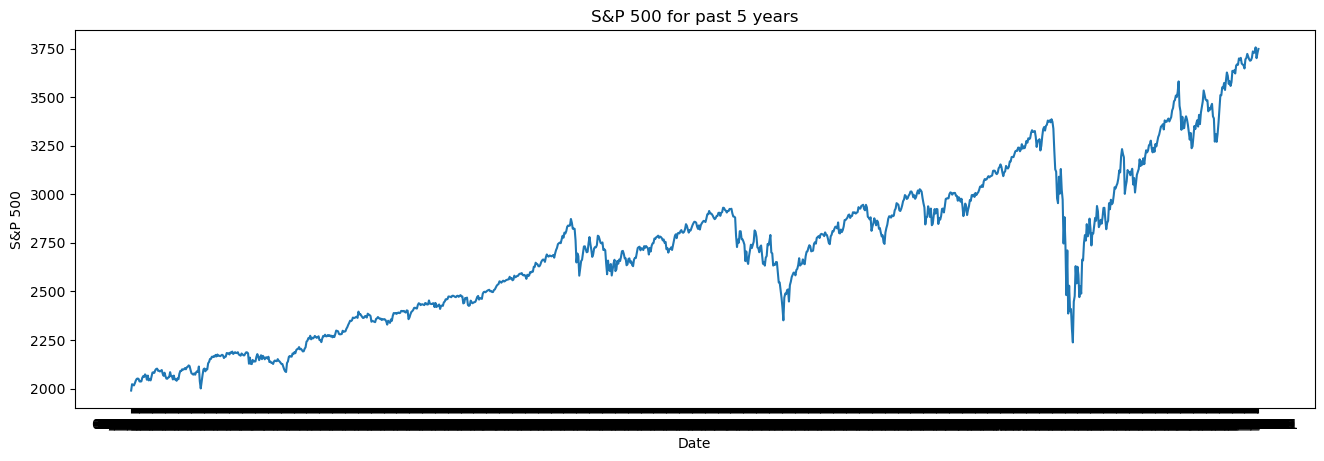

In [35]:
def plot_data(data, x, y, title="", xlabel='Date', ylabel='S&P 500', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_data(data, x= data.Date, y=data.SP500, title='S&P 500 for past 5 years') 

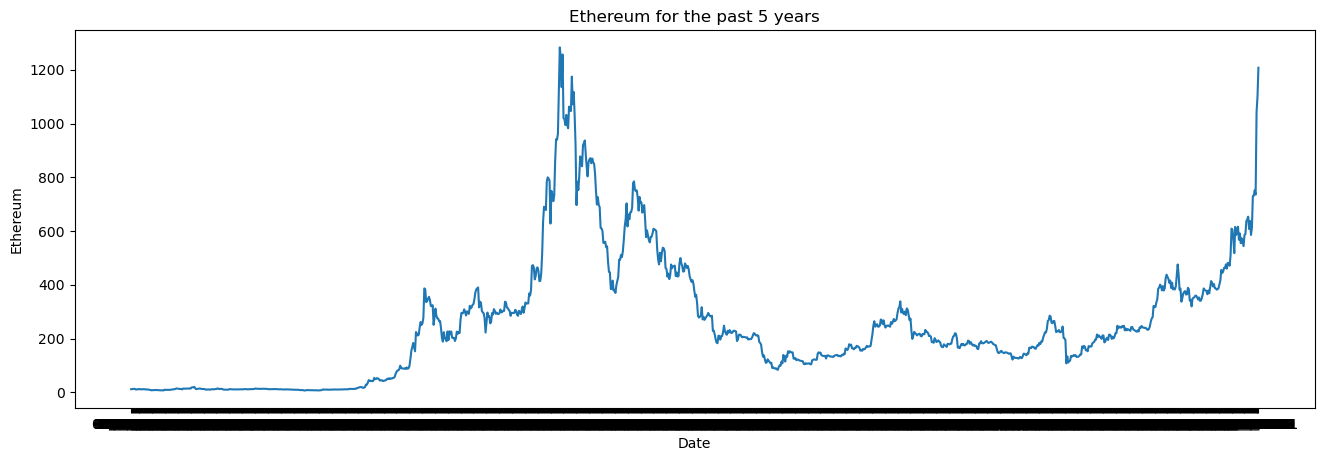

In [36]:
def plot_data(data, x, y, title="", xlabel='Date', ylabel='Ethereum', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_data(data, x= data.Date, y=data.ETH, title='Ethereum for the past 5 years') 

In [37]:
# Null hypothesis, Alt. hypothesis

In [38]:
# Null hypothesis: There is no correlation between the performance of the S&P 500 and Ethereum during the past 5 years. 
# Alt. hypothesis: There is a correlation between the performance of the S&P 500 and Ethereum during the past 5 years.   

In [39]:
# Exploratory Data Analysis

In [40]:
# Standardize the data before correlating and linear regression 

In [41]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler() 
scaled_data = scaler.fit_transform(data[['SP500', 'ETH']]) 
scaled_data = pd.DataFrame(scaled_data, columns=['ETH', 'SP500']) 
scaled_data.head() 

,ETH,SP500
0,-1.780709,-1.038259
1,-1.700765,-1.037389
2,-1.707015,-1.034998
3,-1.716107,-1.032563
4,-1.688438,-1.033346


In [42]:
scaled_data['Date'] = data['Date'] 
scaled_data.head() 

,ETH,SP500,Date
0,-1.780709,-1.038259,03/10/2016
1,-1.700765,-1.037389,03/11/2016
2,-1.707015,-1.034998,03/14/2016
3,-1.716107,-1.032563,03/15/2016
4,-1.688438,-1.033346,03/16/2016


In [43]:
# Correlation

In [44]:
correlation = scaled_data.corr() 
print(correlation) 

            ETH     SP500
ETH    1.000000  0.466259
SP500  0.466259  1.000000


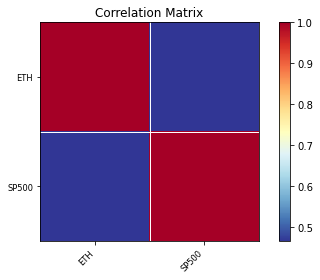

In [45]:
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show() 

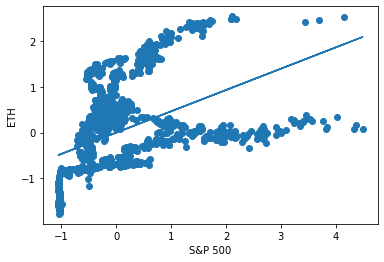

In [46]:
plt.scatter(scaled_data['SP500'], scaled_data['ETH']) 
plt.xlabel('S&P 500') 
plt.ylabel('ETH') 
x = scaled_data['SP500']
y = scaled_data['ETH'] 
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b) 
plt.show()

In [47]:
covariance = np.cov(scaled_data['SP500'], scaled_data['ETH'])  
print(covariance) 

[[1.00082305 0.46664306]
 [0.46664306 1.00082305]]


In [48]:
import scipy.stats as stats
pearson_r = stats.pearsonr(scaled_data['SP500'], scaled_data['ETH'])  
print(pearson_r) 

(0.4662593039301598, 1.172962869823389e-66)


In [49]:
spearman_r = stats.spearmanr(scaled_data['SP500'], scaled_data['ETH']) 
print(spearman_r) 

SpearmanrResult(correlation=0.5722639665247796, pvalue=1.0377746171226677e-106)


In [50]:
# Linear Regression 
from scipy.stats import linregress
linregress(scaled_data['SP500'], scaled_data['ETH']) 

LinregressResult(slope=0.4662593039301599, intercept=-4.129726614559646e-17, rvalue=0.4662593039301599, pvalue=1.1729628698239437e-66, stderr=0.025389912600488222)

In [51]:
# Since our p-value is lower than 0.05 we can reject the null hypothesis, and therefore, we can statistically say that Ethereum and stock prices (S&P 500) are moving together.

In [52]:
# Seasonality Plots 

Text(0, 0.5, 'S&P 500')

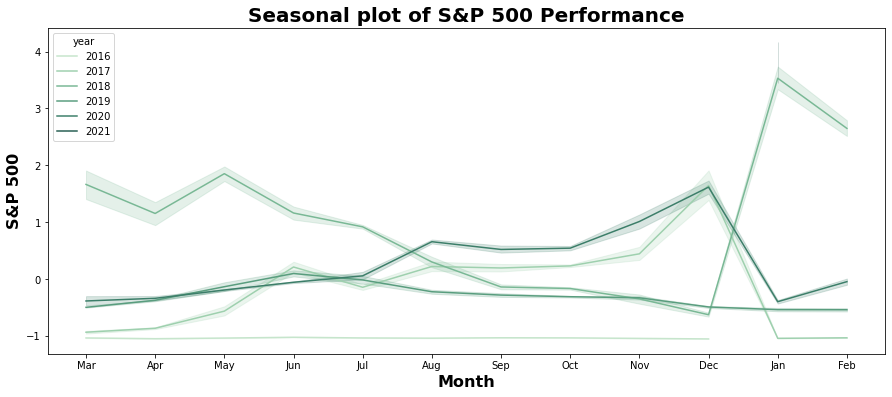

In [53]:
scaled_data['Date'] = pd.to_datetime(scaled_data['Date'])
scaled_data['year'] = [d.year for d in scaled_data.Date]
scaled_data['month'] = [d.strftime('%b') for d in scaled_data.Date]
years = scaled_data['year'].unique()

fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 6)
sns.lineplot(scaled_data['month'], scaled_data['SP500'], hue=scaled_data['year'], palette=palette)
ax.set_title('Seasonal plot of S&P 500 Performance', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('S&P 500', fontsize = 16, fontdict=dict(weight='bold')) 

Text(0, 0.5, 'Ethereum')

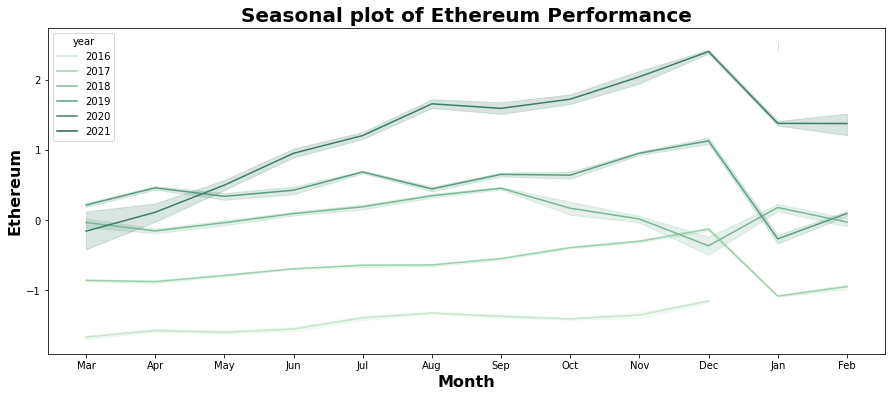

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 6)
sns.lineplot(scaled_data['month'], scaled_data['ETH'], hue=scaled_data['year'], palette=palette)
ax.set_title('Seasonal plot of Ethereum Performance', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Ethereum', fontsize = 16, fontdict=dict(weight='bold')) 

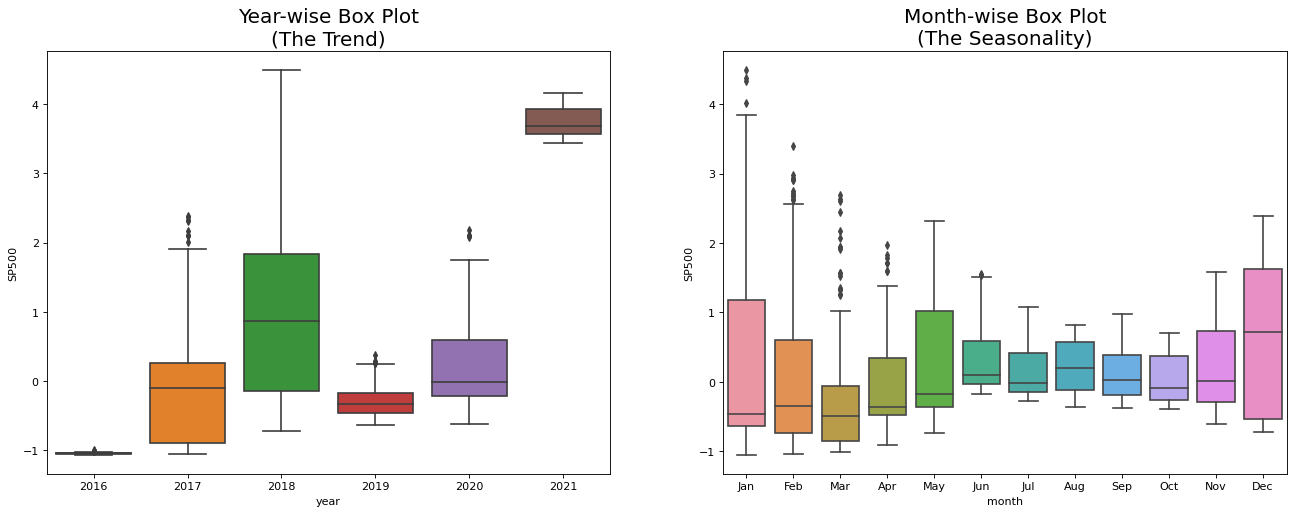

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='SP500', data=scaled_data, ax=axes[0])
sns.boxplot(x='month', y='SP500', data=scaled_data.loc[~scaled_data.year.isin([2016, 2021]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

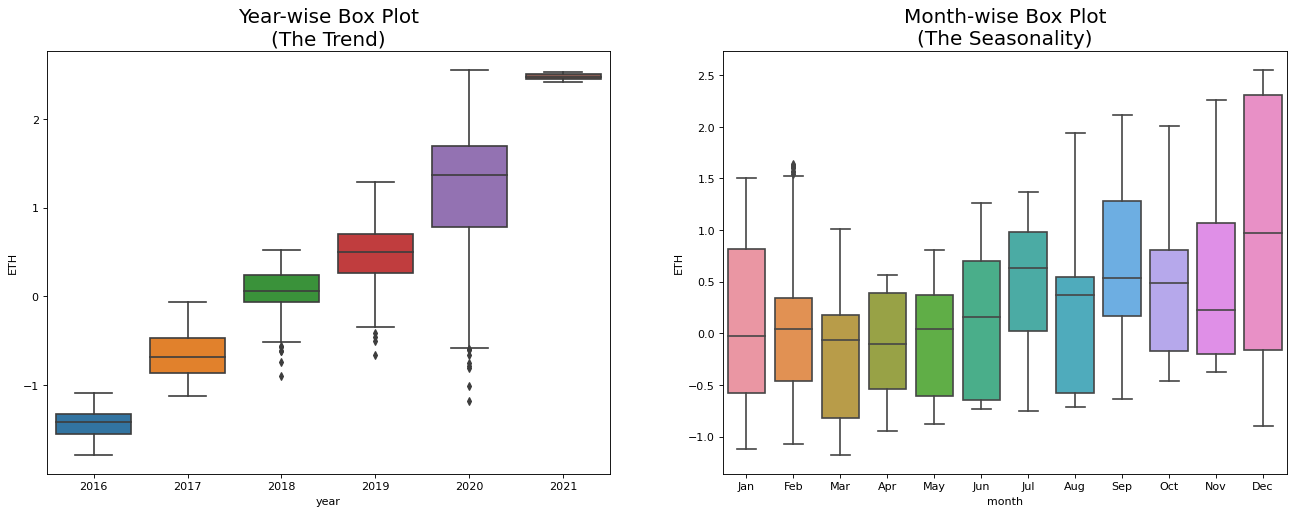

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='ETH', data=scaled_data, ax=axes[0])
sns.boxplot(x='month', y='ETH', data=scaled_data.loc[~scaled_data.year.isin([2016, 2021]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [57]:
# Split data into training and testing sets 

In [58]:
from sklearn.model_selection import train_test_split 
X = scaled_data['SP500'] 
y = scaled_data['ETH'] 
X_train = X[:972]
X_test = X[972:] 
y_train = y[:972] 
y_test = y[972:] 

In [59]:
# Model 1

In [60]:
model = linear_model.LinearRegression() 
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train) 
model.fit(X_train, y_train) 
X_test = pd.DataFrame(X_test) 
y_pred = model.predict(X_test) 

# The Coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred)) 

Coefficients: 
 [[0.31149417]]
Mean squared error: 2.43
Coefficient of determination: -2.74


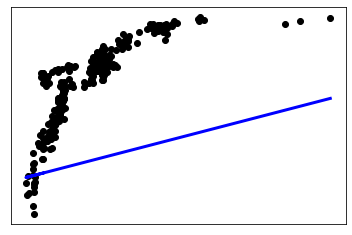

In [61]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show() 

In [66]:
y_pred = y_pred.ravel() 
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 

Mean Absolute Error: 1.45 degrees.


In [67]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: -8.59 %.


In [68]:
# Model 2

In [69]:
scaled_data['SP500 T-1'] = scaled_data['SP500'].shift(-1)
scaled_data['SP500 T-2'] = scaled_data['SP500'].shift(-2)
scaled_data.head() 

,ETH,SP500,Date,year,month,SP500 T-1,SP500 T-2
0,-1.780709,-1.038259,2016-03-10,2016,Mar,-1.037389,-1.034998
1,-1.700765,-1.037389,2016-03-11,2016,Mar,-1.034998,-1.032563
2,-1.707015,-1.034998,2016-03-14,2016,Mar,-1.032563,-1.033346
3,-1.716107,-1.032563,2016-03-15,2016,Mar,-1.033346,-1.042650
4,-1.688438,-1.033346,2016-03-16,2016,Mar,-1.042650,-1.042650


In [70]:
X = scaled_data[['SP500', 'SP500 T-1', 'SP500 T-2']] 
y = scaled_data['ETH']  
X_train = X[:972]
X_test = X[972:] 
y_train = y[:972] 
y_test = y[972:] 
X_test = X_test.dropna() 
y_test = y_test[:-2] 

In [71]:
y_test.tail()

1209    2.497788
1210    2.477398
1211    2.489652
1212    2.548543
1213    2.412723
Name: ETH, dtype: float64

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

prac_model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
prac_model = RandomizedSearchCV(estimator = prac_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
prac_model.fit(X_train, y_train)
prac_model.best_params_ 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.9s finished


{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [73]:
model2 = RandomForestRegressor(n_estimators = 80, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', 
            max_depth = None, bootstrap = True)  
model2.fit(X_train, y_train) 
y_pred = model2.predict(X_test) 

errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 

Mean Absolute Error: 1.34 degrees.


In [74]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 20.05 %.


In [75]:
# Model 3 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
X_train = X_train.dropna() 
X_test = X_test.dropna() 
y_train = y_train[:-2] 

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

prac_model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
prac_model = RandomizedSearchCV(estimator = prac_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
prac_model.fit(X_train, y_train)
prac_model.best_params_ 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.8s finished


{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [78]:
model2 = RandomForestRegressor(n_estimators = 80, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', 
            max_depth = 10, bootstrap = True)  
model2.fit(X_train, y_train) 
y_pred = model2.predict(X_test) 

errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 

Mean Absolute Error: 0.57 degrees.


In [79]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: -160.66 %.
